# (7주차) 10월25일 
> query를 이용하여 행을 선택하는 방법, fifa22자료 분석 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wmgjZrT0OsJ4EuA9RDNKwL

`-` (1/5) query를 이용한 행선택 

`-` (2/5) fifa22자료 설명 

`-` (3/5) fifa22자료 데이터변형 및 시각화 (1)

`-` (4/5) fifa22자료 데이터변형 및 시각화 (2)

`-` (5/5) 과제설명 

### query 

In [2]:
import numpy as np 
import pandas as pd

In [3]:
np.random.seed(1)
df=pd.DataFrame(np.random.normal(size=(15,4)),columns=list('ABCD'))
df

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


#### A>0 and B<0 인 행을 선택 

`-` 방법1

In [4]:
df.query('A>0 & B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


`-` 방법2

In [5]:
df.query('A>0 and B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


#### A<B<C 인 행을 선택

In [6]:
df.query('A<B<C')

,A,B,C,D
9,-1.117310,0.234416,1.659802,0.742044
13,-1.142518,-0.349343,-0.208894,0.586623


#### A>mean(A) 인 행을 선택

`-` 방법1

In [7]:
df.A.mean()

-0.018839420539994597

In [8]:
df.query('A>-0.018839420539994597')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


`-` 방법2

In [9]:
meanA=df.A.mean()
meanA

-0.018839420539994597

In [10]:
df.query('A> @meanA')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


#### A>mean(A) 이고, A<0.8 인 것을 선택 

`-` 방법1

In [11]:
df.query(' A> @meanA and A<0.8')

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


`-` 방법2

In [12]:
df.query(' A> @meanA'
         ' and A<0.8')

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


`-` 참고사항: 아래는 에러가 발생한다. 

In [13]:
df.query('A> @meanA'
         'and A<0.8')

SyntaxError: invalid syntax (<unknown>, line 1)

#### 단순인덱싱 

In [14]:
df

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


`-` 0, 3:5, 9:11 에 해당하는 row를 뽑고싶다. $\to$ 칼럼이름을 `index`로 받아서 사용한다. 

In [15]:
df.query('index==0 or 3<=index <=5  or 9<=index <=11')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455
11,0.050808,-0.636996,0.190915,2.100255


`-` 응용사례1

In [16]:
df.query('index==0 or index ==[8,9,10]')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455


`-` 응용사례2 

In [17]:
i1= np.arange(3)
i1

array([0, 1, 2])

In [18]:
df.query('index in @i1  or index==5')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
5,-1.100619,1.144724,0.901591,0.502494


`-` 시계열자료에서 특히 유용함 

In [19]:
df2=pd.DataFrame(np.random.normal(size=(10,4)), columns=list('ABCD'), index=pd.date_range('20201226',periods=10))

In [20]:
df2

,A,B,C,D
2020-12-26,-0.754398,1.252868,0.512930,-0.298093
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-28,2.185575,-1.396496,-1.444114,-0.504466
2020-12-29,0.160037,0.876169,0.315635,-2.022201
2020-12-30,-0.306204,0.827975,0.230095,0.762011
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-01,0.198300,0.119009,-0.670662,0.377564
2021-01-02,0.121821,1.129484,1.198918,0.185156
2021-01-03,-0.375285,-0.638730,0.423494,0.077340
2021-01-04,-0.343854,0.043597,-0.620001,0.698032


In [21]:
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" ')

,A,B,C,D
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-28,2.185575,-1.396496,-1.444114,-0.504466
2020-12-29,0.160037,0.876169,0.315635,-2.022201
2020-12-30,-0.306204,0.827975,0.230095,0.762011
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-01,0.198300,0.119009,-0.670662,0.377564
2021-01-02,0.121821,1.129484,1.198918,0.185156
2021-01-03,-0.375285,-0.638730,0.423494,0.077340


In [22]:
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" '
    ' and A+B < C')

,A,B,C,D
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-03,-0.375285,-0.638730,0.423494,0.077340


### FIFA 선수들 시각화

### FIFA data 

`-` FIFA22라는 축구게임이 있음 (굉장히 인기있음) 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 이 능력치에 대한 데이터셋은 캐글에 공개되어 있음 

### Data

In [24]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

`-` Overall을 기준으로 정렬하여 보자.

In [25]:
fifa22=fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'})

In [26]:
fifa22.head()

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0


### Overall vs Potential

In [30]:
from plotnine import *

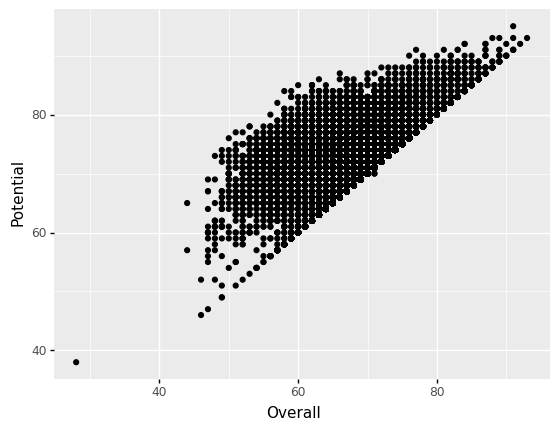

<ggplot: (8766943203419)>

In [31]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential'))

`-` 뭔가 Potential > Overall 인 관계가 성립하는것 같다. $\to$ Potetial2= Potential - Overall 인 변수를 새로 만들고 시각화해보자. 
- 판다스: 새로운열 추가

In [32]:
fifa22['Potential2'] = fifa22['Potential'] - fifa22['Overall']

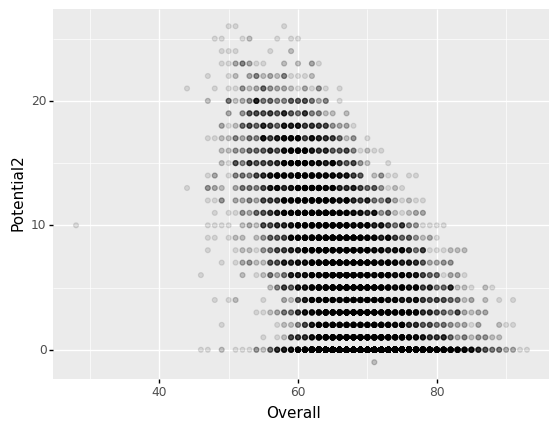

<ggplot: (8766943123941)>

In [33]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1)

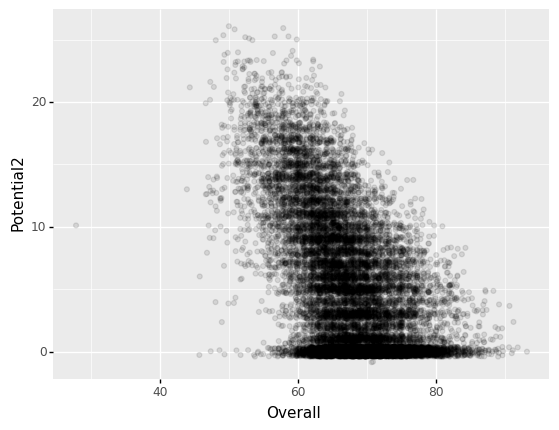

<ggplot: (8766942753591)>

In [34]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter')

`-` 포텐셜2가 너무 0근처인 선수들이 있다. (아마 은퇴한 선수가 아닐까?) $\to$ 제외하고 그리자. 

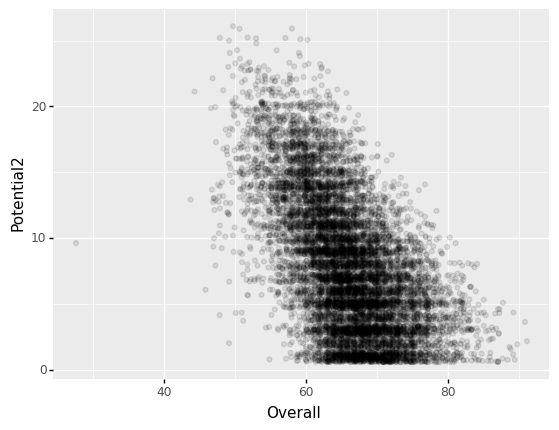

<ggplot: (8766942938091)>

In [35]:
ggplot(data=fifa22.query('Potential2>0.1'))+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter')

`-` 해석 
- 음의 상관관계가 있다. 
- 오버올이 클수록 포텐셜2의 분산이 작아진다. (오버올이 클수록 더 성장할 부분이 없으니까) 

`-` Overall을 구간별로 나누자: 어느정도가 적당한 구간일까? 

In [36]:
fifa22.Overall.describe()

count    16710.000000
mean        67.646320
std          6.457695
min         28.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64

In [37]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

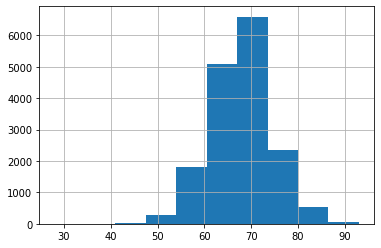

In [38]:
fifa22.Overall.hist()

In [39]:
def f(x): 
    if x>72: y='Q1' 
    elif x>68: y='Q2'
    elif x>63: y='Q3'
    else: y='Q4'
    return y 

In [40]:
fifa22['Q']=list(map(f,fifa22.Overall))
fifa22[['Q','Overall']]

,Q,Overall
0,Q1,93
1,Q1,92
2,Q1,91
3,Q1,91
4,Q1,91
...,...,...
16705,Q4,46
16706,Q4,46
16707,Q4,44
16708,Q4,44


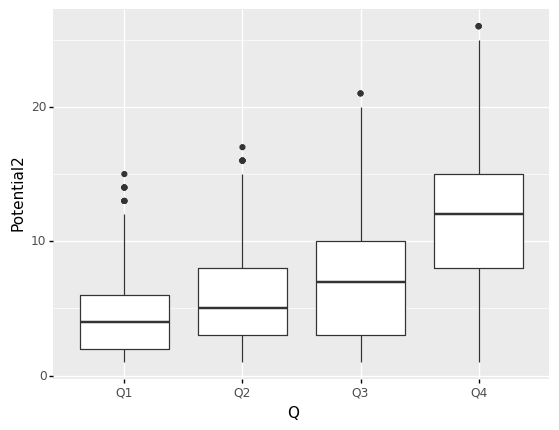

<ggplot: (8766938801267)>

In [41]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_boxplot(aes(x='Q',y='Potential2'))

`-` Q1으로 갈수록 분산이 작아짐! $\to$ 헷갈린다... 

`-` 산점도와 박스플랏을 겹쳐서 그린다면 좀더 이해가 쉬울것 같다. 

`-` x축의 위치를 조정하면 될것 같다 $\to$ Q1, Q2, Q3, Q4 각 그룹별로 x축의 위치를 구하자. 

In [42]:
fifa22.query('Q=="Q1"').Overall.mean()

76.3506528835691

- 이런식으로 해도 되지만 

In [43]:
fifa22.groupby(by='Q').mean().Overall

Q
Q1    76.350653
Q2    70.411781
Q3    66.074449
Q4    59.602691
Name: Overall, dtype: float64

In [44]:
l=fifa22.groupby(by='Q').mean().Overall.to_list()
l

[76.3506528835691, 70.4117807472048, 66.07444942506334, 59.60269121813031]

`-` 이제 박스플랏이 들어갈 x축의 위치를 저장할 컬럼을 추가하고 그 이름을 Qx 라고 하자. 

In [45]:
def g(x): 
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [46]:
fifa22['Qx']=list(map(g,fifa22.Q))

In [47]:
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Q,Qx
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,15.0,14.0,8.0,RW,93.0,€144.3M,20.0,0,Q1,76.350653
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,12.0,8.0,10.0,ST,92.0,€197.2M,35.0,0,Q1,76.350653
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,78.0,90.0,90.0,GK,91.0,€238M,27.0,2,Q1,76.350653
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,0,Q1,76.350653
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,15.0,15.0,11.0,LW,91.0,€238.7M,35.0,0,Q1,76.350653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,6.0,13.0,6.0,CM,45.0,€47K,NaN,0,Q4,59.602691
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,8.0,14.0,11.0,CB,46.0,NaN,NaN,6,Q4,59.602691
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,46.0,20.0,20.0,CM,46.0,NaN,NaN,21,Q4,59.602691
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,16.0,9.0,7.0,CB,44.0,NaN,NaN,13,Q4,59.602691


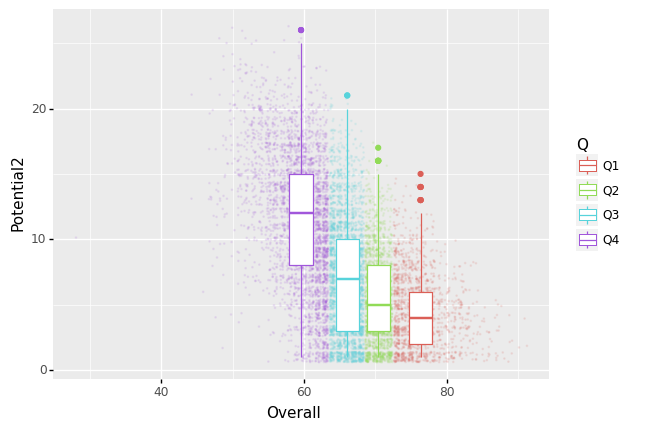

<ggplot: (8766942887677)>

In [48]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall', y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx', y='Potential2',color='Q'))

### 숙제 

fifa22 데이터셋에서 `Q==Q1`이고, `Potentail2>20` 인 선수들의 이름을 출력하라. 